In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import lognorm

In [3]:
data = np.loadtxt('sample23.dat')

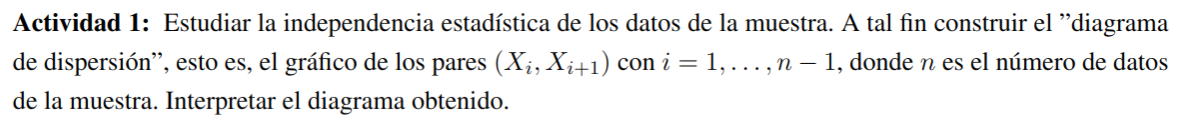

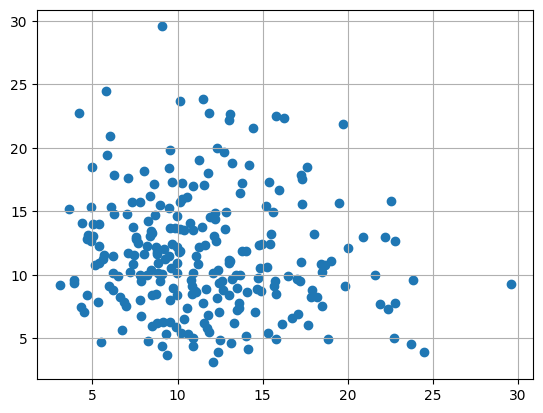

In [4]:
fig, ax = plt.subplots()
x = data[:-1]
y = data[1:]
ax.scatter(x, y)
ax.grid(True)
plt.show()

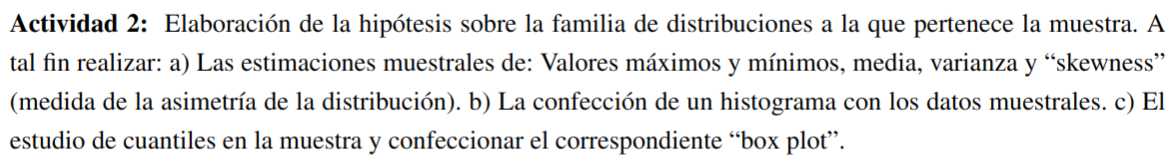

In [4]:
# Tamaño muestral
tam_muestral = len(data)

# Máximo muestral
M = max(data)

# Mínimo muestral
m = min(data)

# Media muestral
media_muestral = sum(data) / tam_muestral

# Varianza muestral
Scuad = 0
for i in range(tam_muestral):
    Scuad += (data[i] - media_muestral)**2
Scuad /= (tam_muestral - 1)

# Scuad = np.var(data)

# Skewness
Skew = 0
for i in range(tam_muestral):
    Skew += (data[i] - media_muestral)**3
Skew /= tam_muestral
Skew /= Scuad**(3/2)

table = [
    ['Tamaño muestral', tam_muestral],
    ['Máximo muestral', M],
    ['Mínimo muestral', m],
    ['Media muestral', media_muestral],
    ['Varianza muestral', Scuad],
    ['Asimetría muestral', Skew]
]
print(tabulate(
    table,
    tablefmt='heavy_grid',
    colalign=('center','center')
))

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃  Tamaño muestral   ┃   250    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━┫
┃  Máximo muestral   ┃ 29.5675  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━┫
┃  Mínimo muestral   ┃ 3.09293  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━┫
┃   Media muestral   ┃ 11.6014  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━┫
┃ Varianza muestral  ┃ 22.0667  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━┫
┃ Asimetría muestral ┃ 0.725423 ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━┛


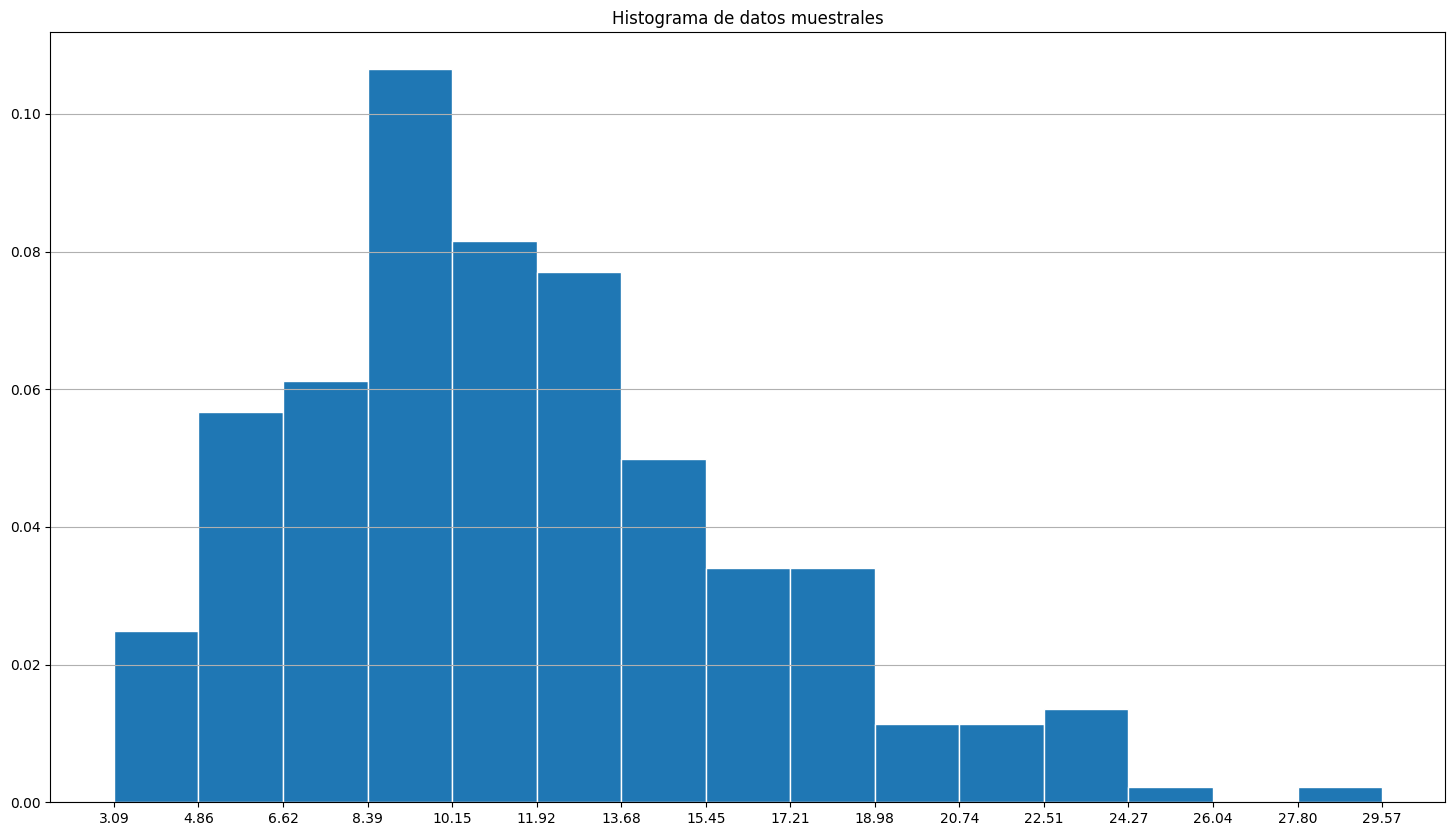

In [6]:
k = int(np.sqrt(tam_muestral))
fig, ax = plt.subplots(figsize=[18,10])
n, bins, patches = ax.hist(data, bins=k, edgecolor="white", density=True)
ax.grid(axis='y')
plt.title('Histograma de datos muestrales')
plt.xticks(bins)
plt.show()

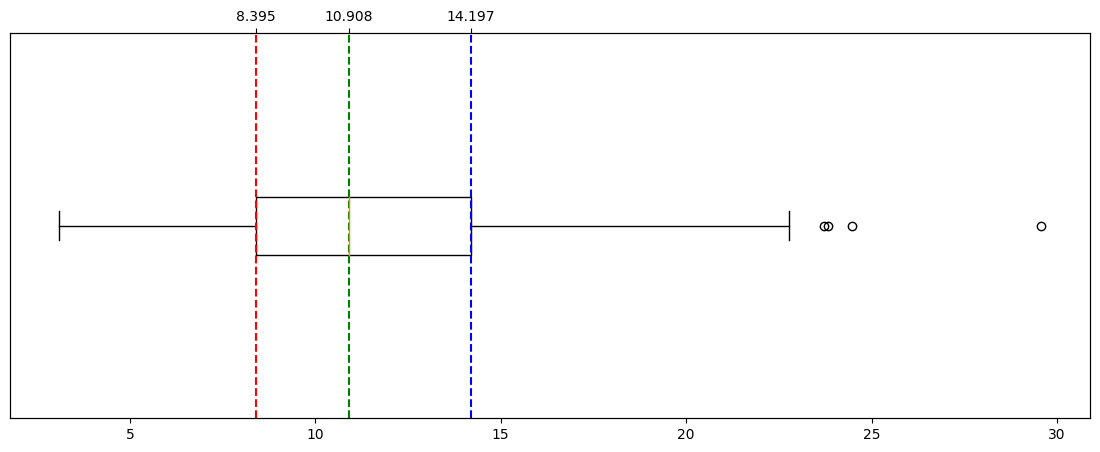

In [7]:
quantiles = np.quantile(data, [0.25, 0.5, 0.75])

fig, ax = plt.subplots(figsize=[18,5])
ax.boxplot(data, vert=False)
ax.set_yticks([])
ax.axvline(quantiles[0], linestyle='--', color='red')
ax.axvline(quantiles[1], linestyle='--', color='green')
ax.axvline(quantiles[2], linestyle='--', color='blue')

# Agregamos un nuevo eje y a la derecha para los cuantiles
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(quantiles)

plt.subplots_adjust(left=0.2, right=0.8)
plt.show()

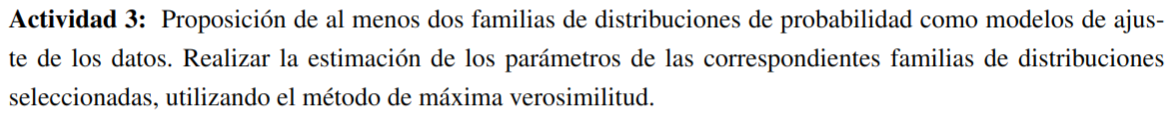

Para llevar a cabo esta propuesta, es importante notar algunas características acerca de los datos muestrales obtenidos:
- Todos los datos son **positivos**.
- Los datos son **continuos**.
- Los datos son **asimétricos hacia la izquierda**: viendo el histograma del Ejercicio 1, resulta claro que hay valores contenidos en ciertos intervalos que ocurren con más frecuencia que otros. Por ejemplo, los datos contenidos en el intervalo (7.33, 13.68) son más que los del intervalo (18.98, 24.27). Además, decimos que son asimétricos hacia la izquierda porque en el boxplot del Ejercicio 3 se puede ver claramente que la caja esta hacia la izquierda.
- Los datos **atípicos** presentes en la muestra son todos **positivos**: esto se puede ver analizando el box plot del Ejercicio 2.

Teniendo todos estos factores en cuenta y guiándonos por la forma de las funciones de densidad de probabilidad de las distintas distribuciones, decidimos ajustar los datos con las siguientes distribuciones:
- Distribución Lognormal de parámetros $\mu$ y $\sigma^2$.
- Distribución Gamma de parámetros a y b.
- Distribución Weibull de parámetros $\alpha$ y $\beta$.

### Estimación de parámetros utilizando método de máxima verosimilitud

#### Distribución Lognormal de parámetros $\mu$ y $\sigma^2$

El estimador de máxima verosimilitud para $\mu$ es:
$$
\^{\mu} = \frac{\sum_{i=1}^{n} ln(X_i)}{n}
$$

El estimador de máxima verosimilitud para $\sigma$ es:
$$
\^{\sigma} = \left[    \frac{\sum_{i=1}^{n} {(ln(X_i) - \^{\mu})^2}}{n}    \right]^{\frac{1}{2}}
$$

In [5]:
est_mu = 0
for X in data:
    est_mu += np.log(X)
est_mu /= tam_muestral
print(f'Estimación de Máxima Verosimilitud para mu: {est_mu}')

est_sigma = 0
for X in data:
    est_sigma += (np.log(X) - est_mu)**2
est_sigma /= tam_muestral
est_sigma **= (1/2)
print(f'Estimación de Máxima Verosimilitud para sigma: {est_sigma}')

Estimación de Máxima Verosimilitud para mu: 2.367063529069154
Estimación de Máxima Verosimilitud para sigma: 0.4202521999350007


#### Distribución Gamma de parámetros $\alpha$ y $\beta$
Los estimadores de máxima verosimilitud deben satisfacer las ecuaciones:
$$
    ln(\^{\beta}) + \psi(\^{\alpha}) = \frac{\sum_{i=1}^{n} ln(X_i)}{n}, \^{\alpha}\^{\beta} = \bar{X}
$$
Donde tenemos que:
$$
    \psi(\^{\alpha}) = \frac{\Gamma'(\^{\alpha})}{\Gamma(\^{\alpha})}
$$
Sin embargo, podemos estimar estimar el parámetro $\alpha$ en función de T, donde:
$$
    T = \left[ln(\bar{X}) - \frac{\sum_{i=1}^{n} ln(X_i)}{n} \right]^{-1}
$$
Luego al haber estimado $\alpha$ podemos estimar $\beta$ de la siguiente forma:
$$
    \^{\beta} = \frac{\bar{X}}{\^{\alpha}}
$$

In [20]:
sum_log = 0
for X in data:
    sum_log += np.log(X)
sum_log /= n

T = (np.log(media_muestral) - sum_log) ** (-1)

# Estimación del valor de alfa a partir del valor de T, T = 11.8964. 
est_alfa = 6.1
print(f'Estimación de Máxima Verosimilitud para alfa: {est_alfa}')

est_beta = media_muestral/est_alfa
print(f'Estimación de Máxima Verosimilitud para alfa: {est_alfa}')

Estimación de Máxima Verosimilitud para alfa: 6.1
Estimación de Máxima Verosimilitud para alfa: 6.1


#### Distribución Weibull de parámetros $\alpha$ y $\beta$
El estimador de máxima verosimilitud para $\alpha$ es:
$$

$$

El estimador de máxima verosimilitud para $\beta$ es:
$$

$$

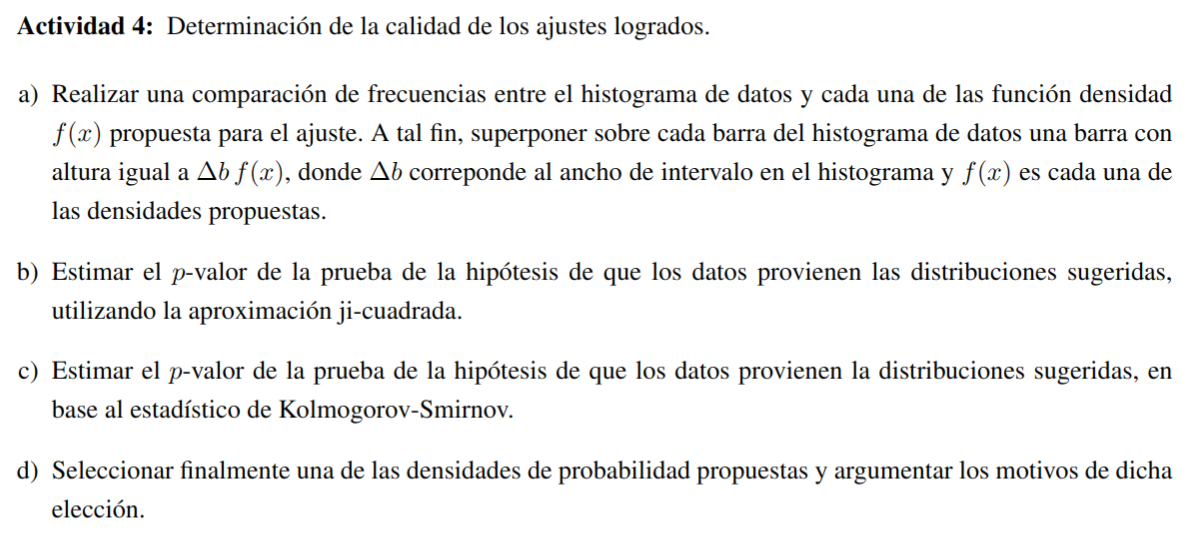

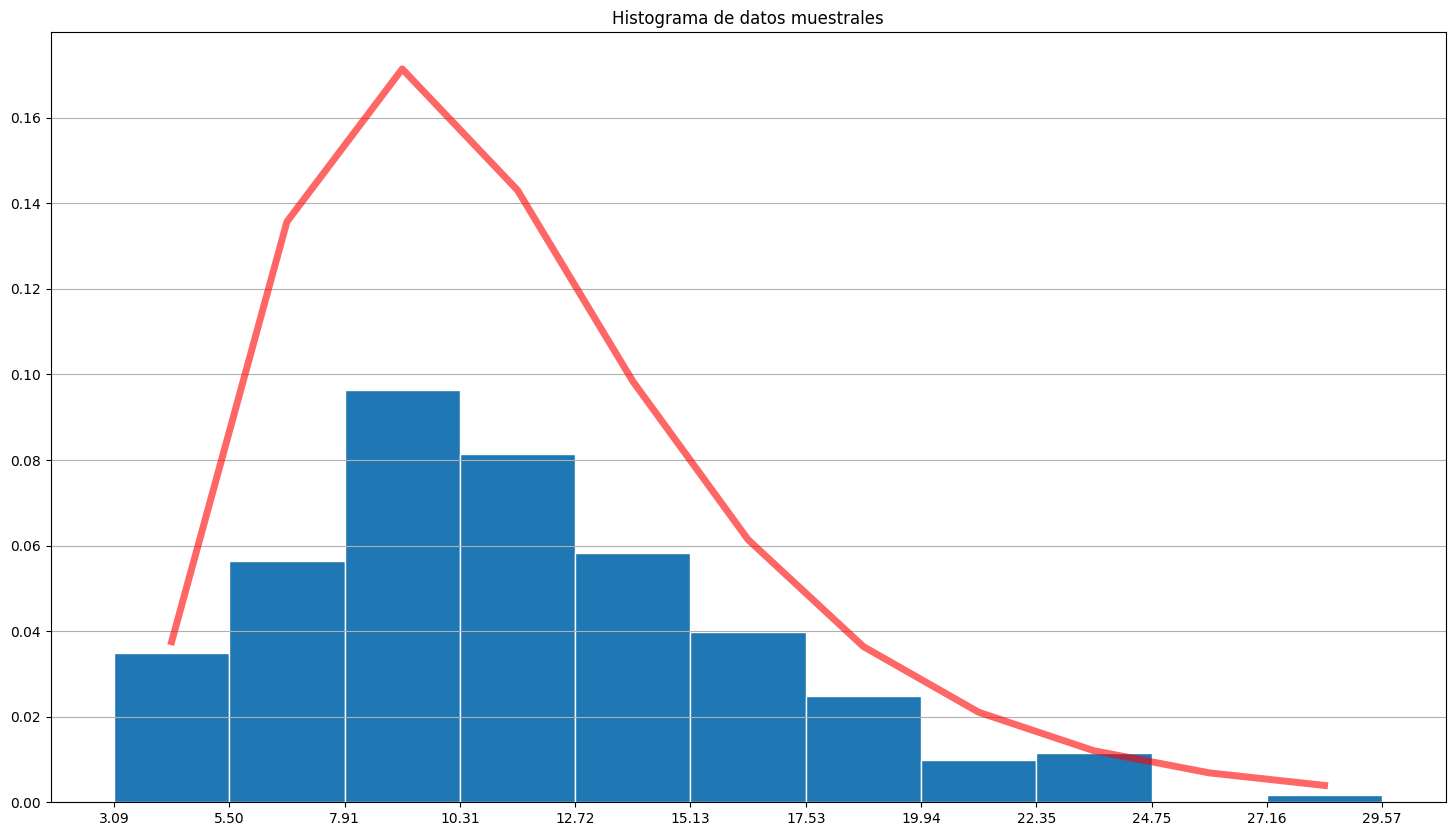

In [10]:
k = int(np.sqrt(tam_muestral))
fig, ax = plt.subplots(figsize=[18,10])
n, bins, patches = ax.hist(data, bins=k, edgecolor="white", density=True)
ax.grid(axis='y')
plt.title('Histograma de datos muestrales')
plt.xticks(bins)

delta_b = (M - m) / k
x = [(bins[i] + bins[i+1])/2 for i in range (len(bins)-1)]
ax.plot(x, lognorm.pdf(x, s=est_sigma, loc=0, scale=np.exp(est_mu)) * delta_b,
        'r-', lw=5, alpha=0.6, label='lognorm pdf')

plt.show()

# frec_log_normal = []
# delta_b = (M-m)/25
# for i in range(25):
#     ext_izq = m+i*delta_b
#     ext_der = ext_izq+delta_b

#### Fuentes de consulta
- [Distribuciones de probabilidad con Python](https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/)
- [Simulation, Modeling and Analysis - Averill M. Law - 5th Edition (Capítulo 6)](https://industri.fatek.unpatti.ac.id/wp-content/uploads/2019/03/108-Simulation-Modeling-and-Analysis-Averill-M.-Law-Edisi-5-2014.pdf)